In [1]:
import numpy as np
from config import app, db, experiment
from models import *
participants = [p for p in Participant.select().dicts()] # get all participants
trials = [p for p in Trial.select().dicts()] # get all trials

In [2]:
Trial.select().where(Trial.index==1)[:]

[<Trial 1> participant=1, truth=é, assist=1.0, answer1=é, answer2=è, listen_count=3, listens=? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=2, truth=é, assist=1.0, answer1=i, answer2=è, listen_count=4, listens=? ? i ? ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=3, truth=é, assist=1.0, answer1=u, answer2=é, listen_count=3, listens=? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=4, truth=é, assist=1.0, answer1=i, answer2=é, listen_count=4, listens=? ? ? ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=5, truth=é, assist=1.0, answer1=é, answer2=e, listen_count=14, listens=? ? ? ? ? ? ? ? ? ? ? ? ? e ?
  file=/static/data/P5_D4_RT_003_cam_short/%C3%A9_003_sync_1_assist_1.short.wav,
 <Trial 1> participant=6, truth=é, assist=1.0, answer1=é, answer2=i, 

In [3]:
for p in participants:
    print(p)

{'id': 1, 'gender': 'female', 'age': 27, 'native': True, 'consent': True, 'name': 'Marie', 'date_created': datetime.datetime(2024, 2, 8, 10, 49, 36, 684878), 'completed': True, 'trial_permutation': [7, 5, 23, 18, 3, 14, 24, 30, 19, 15, 11, 27, 13, 9, 4, 17, 28, 16, 8, 6, 29, 22, 26, 21, 0, 1, 25, 2, 20, 10, 12]}
{'id': 2, 'gender': 'male', 'age': 25, 'native': True, 'consent': True, 'name': 'The Floof', 'date_created': datetime.datetime(2024, 2, 8, 15, 7, 9, 377495), 'completed': True, 'trial_permutation': [11, 16, 27, 2, 17, 5, 30, 18, 14, 21, 0, 6, 7, 9, 23, 29, 1, 24, 20, 13, 26, 8, 19, 4, 22, 3, 28, 15, 25, 12, 10]}
{'id': 3, 'gender': 'male', 'age': 31, 'native': True, 'consent': True, 'name': 'L.D.', 'date_created': datetime.datetime(2024, 2, 8, 15, 8, 59, 193783), 'completed': True, 'trial_permutation': [28, 14, 11, 15, 27, 10, 23, 26, 24, 16, 4, 21, 7, 8, 12, 2, 25, 19, 9, 17, 5, 1, 13, 20, 6, 22, 30, 3, 29, 0, 18]}
{'id': 4, 'gender': 'male', 'age': 31, 'native': True, 'consen

In [4]:
# participants names
print('\n'.join( f"{p['id']}: {p['name']}" for p in participants))

1: Marie
2: The Floof
3: L.D.
4: Arythtmique2ouf
5: martichou
6: Kinou
7: Epi
8: Clem
9: Florian
10: Bobus
11: 


In [5]:
# vowel reference: https://fr.wikipedia.org/wiki/Formant
# by vowels were analyzed manually with Praat

from collections import namedtuple
Vowel = namedtuple('Vowel', 'F1 F2 nasal F1_by F2_by')
a = Vowel(750, 1450, False, 700, 1250) # by formants are hard to read
i = Vowel(250, 2250, False, 280, 2040)
ou = Vowel(300, 750, False, 290, 780)
u = Vowel(250, 1750, False, 300, 1700)
é = Vowel(400, 2050, False, 330, 1950)
è = Vowel(600, 1750, False, 500, 1850)
e = Vowel(350, 1350, False, 330, 1380) # eu from 'feu'
o = Vowel(350, 750, False, 350, 650)
an = Vowel(750, 1250, True, 600, 880) # by formants are hard to read
on = Vowel(500, 1250, True, 370, 1380)
ain = Vowel(700, 1500, True, 730, 1260)

vowels = {'a': a, 'i': i, 'ou': ou, 'u': u, 'é': é, 'è': è, 'e': e, 'o': o, 'an': an, 'on': on, 'in': ain}

In [6]:
# Helpers

truth = [t['truth'] for t in trials]
pred = [t['answer1'] for t in trials]
pred2 = [t['answer2'] for t in trials]
assist = [t['assist'] for t in trials]


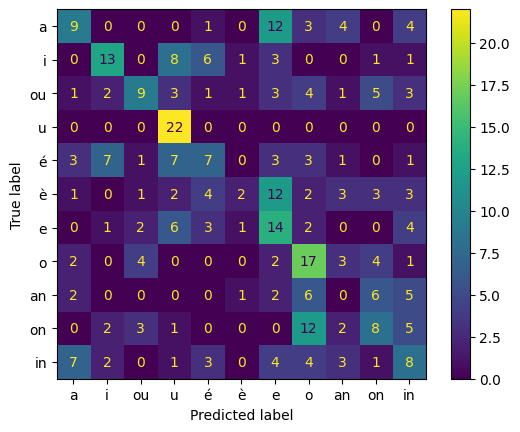

In [7]:
# Confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [v for v in vowels]
confusion = confusion_matrix(truth, pred, labels=labels)
disp = ConfusionMatrixDisplay.from_predictions(truth, pred, labels=labels)


Text(0, 0.5, 'Accuracy')

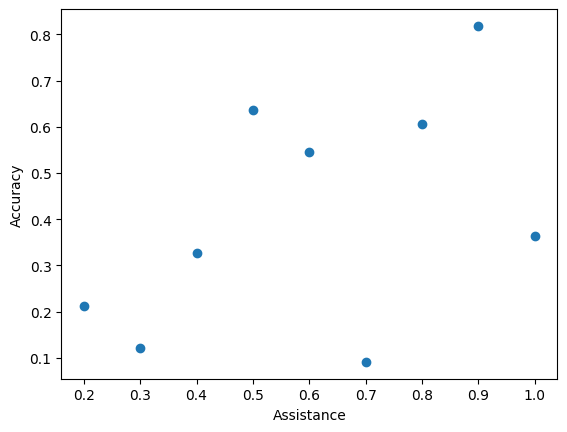

In [8]:
# Effect of assistance on the percentage of correct predictions

assist_values = sorted(list(set(assist)))
bins = []
for assistance in assist_values:
    trials_assist = [t for t in trials if t['assist'] == assistance]
    correct = sum([t['truth'] == t['answer1'] for t in trials_assist])
    bins.append( correct/len(trials_assist) )

ax = plt.axes()
ax.scatter(assist_values, bins)
ax.set_xlabel('Assistance')
ax.set_ylabel('Accuracy')
    

[[ 0. 22.  0.  0.  0.  0. 11.  0.  0.]
 [ 0.  0. 22. 11.  0.  0.  0.  0.  0.]
 [11. 11.  0. 11.  0.  0.  0.  0.  0.]
 [ 0.  0. 11.  0.  0.  0. 11.  0.  0.]
 [11.  0. 11.  0.  0.  0.  0.  0. 11.]
 [11. 11.  0.  0.  0. 11.  0.  0.  0.]
 [11.  0.  0.  0. 11.  0. 11.  0.  0.]
 [22.  0.  0.  0.  0.  0.  0. 11.  0.]
 [ 0. 11.  0.  0.  0. 11.  0.  0.  0.]
 [11.  0. 11. 11.  0.  0.  0.  0.  0.]
 [22. 11.  0.  0.  0.  0.  0.  0.  0.]]


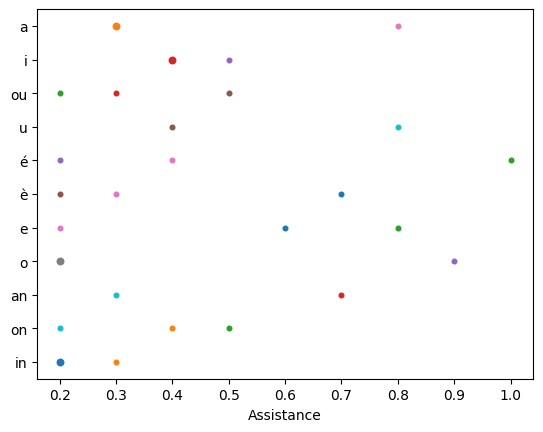

In [9]:
# number of vowels per assist value

assist_values = sorted(list(set(assist)))
ax = plt.axes()

m = np.zeros((len(assist_values), len(vowels)))

for i, assistance in enumerate(assist_values):
    for j, v in enumerate(vowels):
        m[i][j] = Trial.select().where( (Trial.assist==assistance) & (Trial.truth==v) ).count()
        ax.scatter(assistance, len(vowels)-j -1, s=m[i][j])

ax.set_xlabel('Assistance')
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels[::-1])
print(m.transpose())


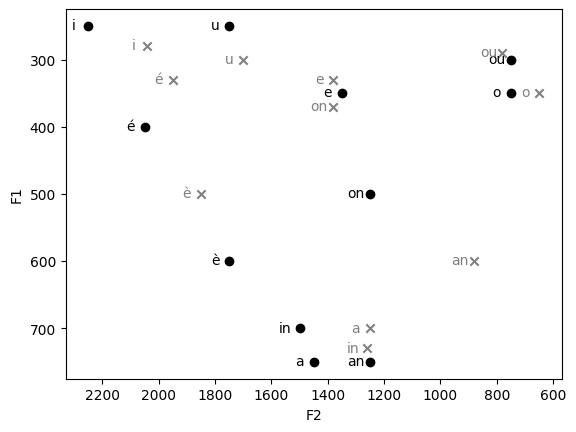

In [74]:
# Vocalic triangle
import matplotlib.pyplot as plt

def plot_vocalic_triangle(ax, standard_formants=True, by_formants=False):
    """ Plot vocalic triangle with reference vowels

        return: axes
    """
    ax.invert_yaxis()
    ax.invert_xaxis()
    
    # plot reference vowels
    for v in vowels:
        if standard_formants:
            f1 = vowels[v].F1
            f2 = vowels[v].F2
            ax.scatter(f2, f1, label=v, c='black', marker='o')
            ax.text(f2 + 50 , f1 + 5, v, ha="center")
            
        if by_formants:
            f1 = vowels[v].F1_by
            f2 = vowels[v].F2_by
            ax.scatter(f2, f1, label=v, c='grey', marker='x')
            ax.text(f2 + 50 , f1 + 5, v, ha="center", c='grey')
    
        ax.set_xlabel('F2')
        ax.set_ylabel('F1')


ax = plt.axes()
plot_vocalic_triangle(ax, standard_formants=True, by_formants=True)


Text(0.5, 0.98, 'All trials')

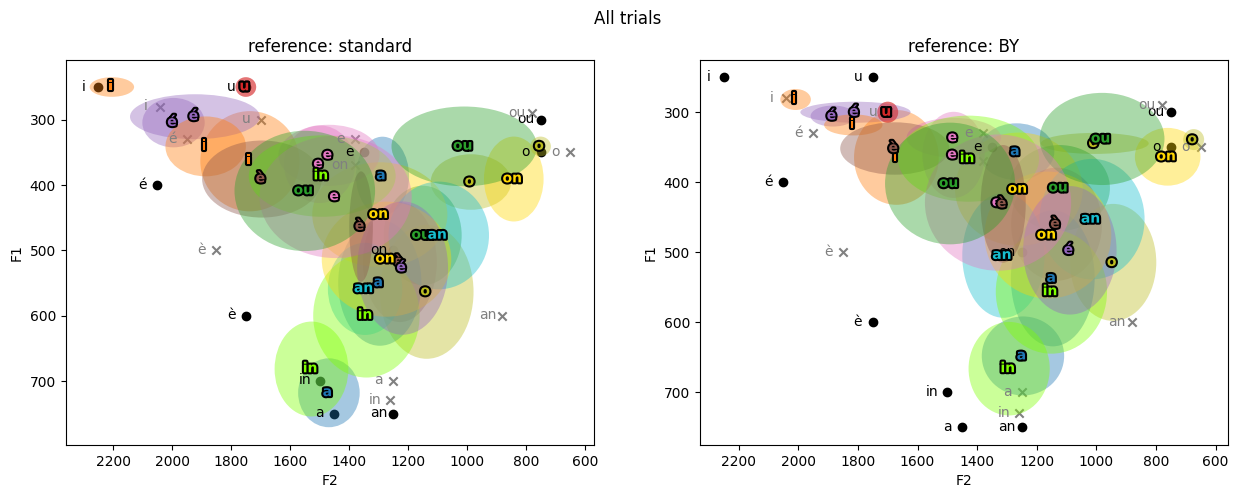

In [126]:
# plot cloud of answered vowels
from typing import Tuple
from statistics import stdev, mean

def trial_stats(realisations: list[Trial], reference='standard') -> Tuple[Tuple[float, float], Tuple[float, float]]:
    """ Mean and standard deviation of the realisations of a trial
    
        reference = 'standard' (default) | 'by'
    """
    def formants(vowel, reference='standard'):
        f1 = vowels[vowel].F1 if reference=='standard' else vowels[vowel].F1_by
        f2 = vowels[vowel].F2 if reference=='standard' else vowels[vowel].F2_by
        return f1, f2
        
    real_vowels_closest = [t.answer1 for t in realisations]
    predicted_formants = [formants(v, reference=reference) for v in real_vowels_closest]

    formants_f1 = [f1 for f1, f2 in predicted_formants]
    formants_f2 = [f2 for f1, f2 in predicted_formants]
    
    return (mean(formants_f1), mean(formants_f2)), (stdev(formants_f1), stdev(formants_f2))


    
from matplotlib.patches import Ellipse
import matplotlib.patheffects as path_effects
    
def plot_trials(ax, trial_selection, min_spread=(30,70), reference='standard', tags=['vowel']):
    # plot vocalic triangle
    plot_vocalic_triangle(ax, standard_formants=True, by_formants=True)
    
    # plot a point with mean estimated F1,F2 for each trial
    
    colors = {'a': 'tab:blue',
              'i': 'tab:orange',
              'ou': 'tab:green',
              'u': 'tab:red',
              'é': 'tab:purple',
              'è': 'tab:brown',
              'e': 'tab:pink',
              'o': 'tab:olive',
              'an': 'tab:cyan',
              'on': 'gold',
              'in': 'chartreuse',
             }

    for i in range(len(trials)):
        realisations = trial_selection.where(Trial.index==i)[:]
        if len(realisations) == 0:
            continue
            
        truth = realisations[0].truth
        (f1, f2), (std_f1, std_f2) = trial_stats(realisations, reference=reference)
        
        ellipse = Ellipse(xy=(f2,f1),
                          width=std_f2 if std_f2 > min_spread[1] else min_spread[1],
                          height=std_f1 if std_f1 > min_spread[0] else min_spread[0],
                          facecolor=colors[truth],
                          alpha=0.4,
                          fill=True,
        )
        
        ax.add_patch(ellipse)

        # compute label to display for each trial
        labels = []
        if 'vowel' in tags:
            labels.append(truth)
        if 'assist' in tags:
            labels.append(str(realisations[0].assist))
        
        text = ax.text(f2 + 5, f1 + 5, ' '.join(labels), ha="center", c=colors[truth], fontweight='bold')
        text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'),
                               path_effects.Normal()])
        

def plot_trials_both_ref(trial_selection, *args, **kwargs):
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    
    plot_trials(axs[0], trial_selection, reference='standard', *args, **kwargs)
    plot_trials(axs[1], trial_selection, reference='by', *args, **kwargs)
    axs[0].set_title('reference: standard')
    axs[1].set_title('reference: BY')

    return fig

    

# plot all trials
all_trials_selection = Trial.select()
fig = plot_trials_both_ref(all_trials_selection)
fig.suptitle('All trials')

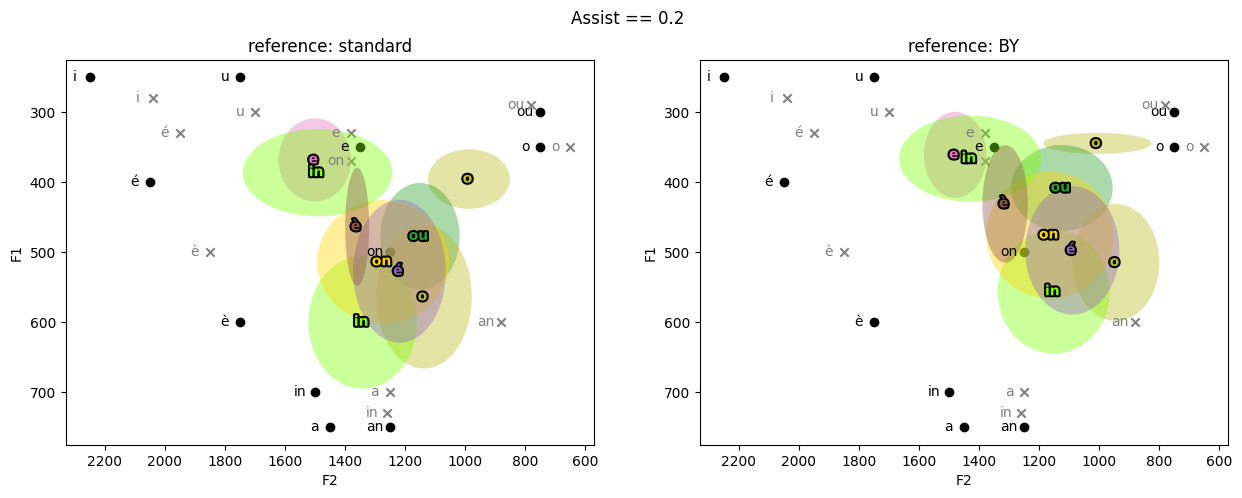

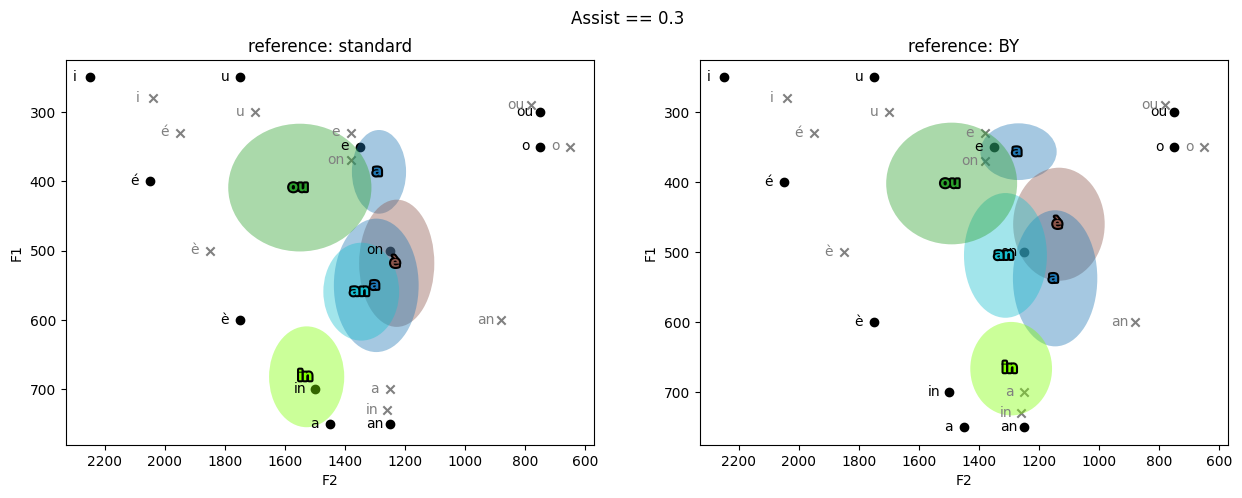

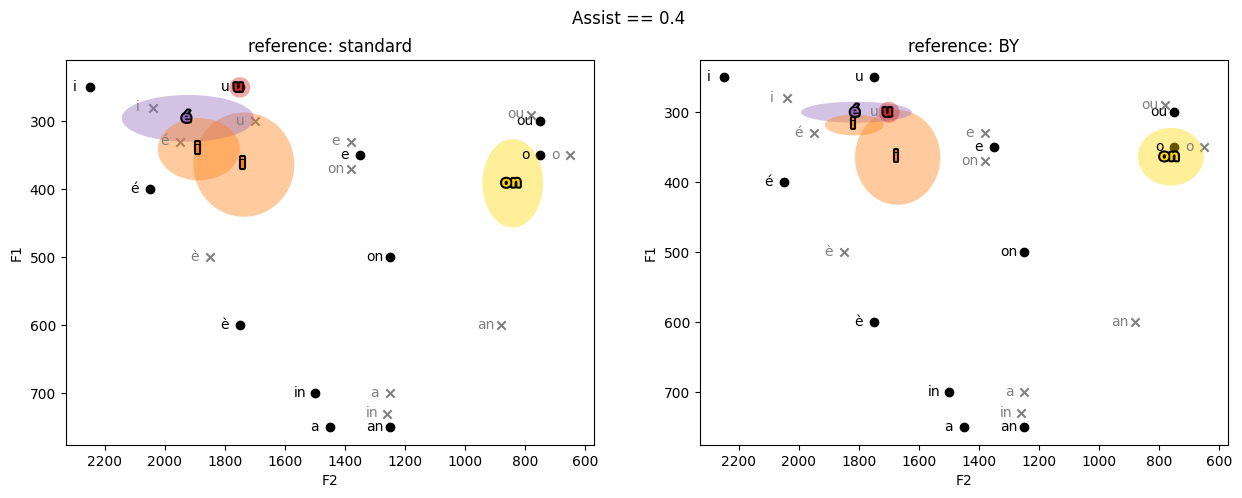

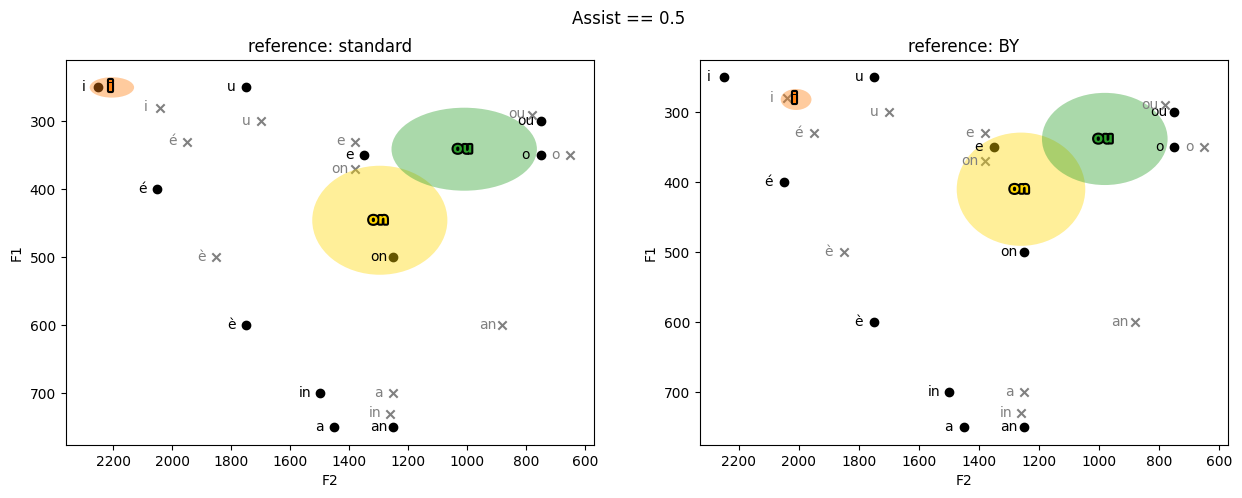

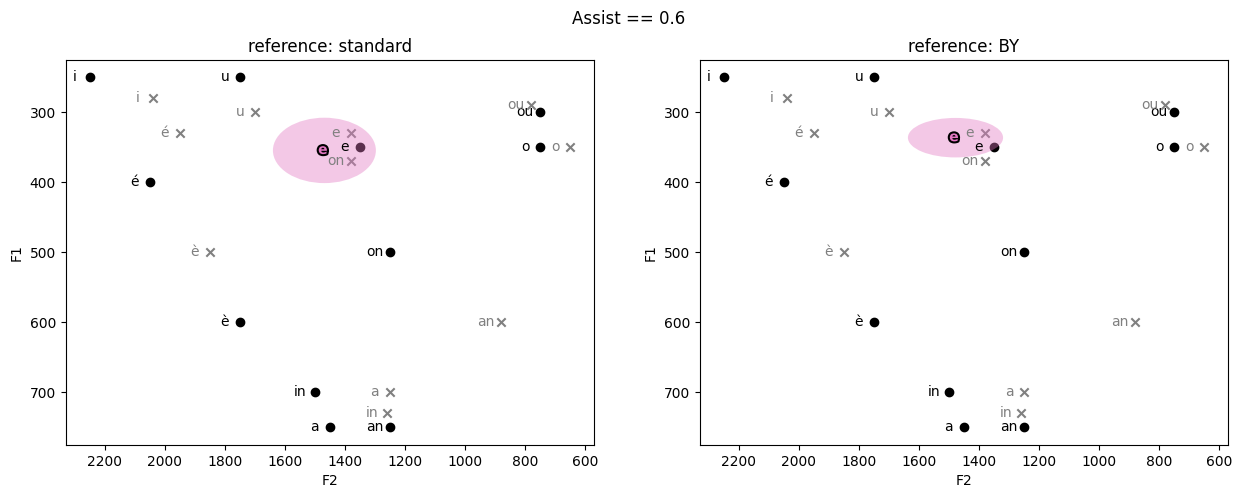

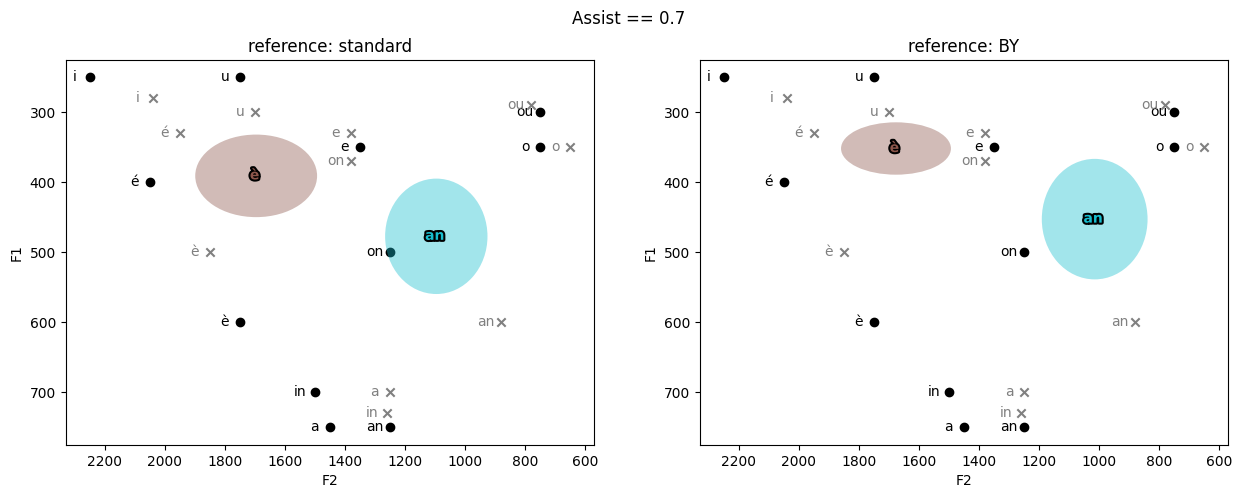

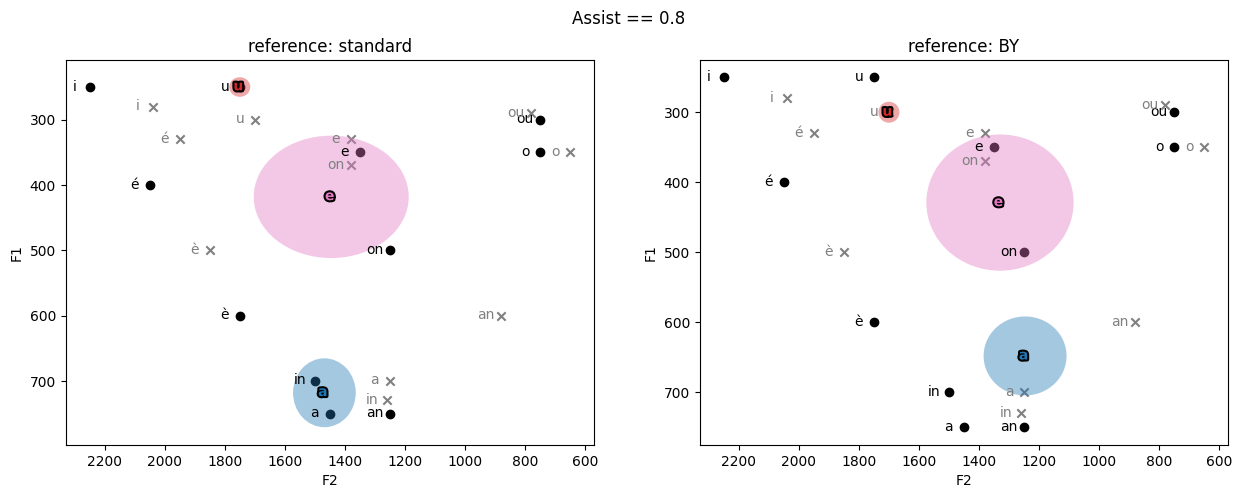

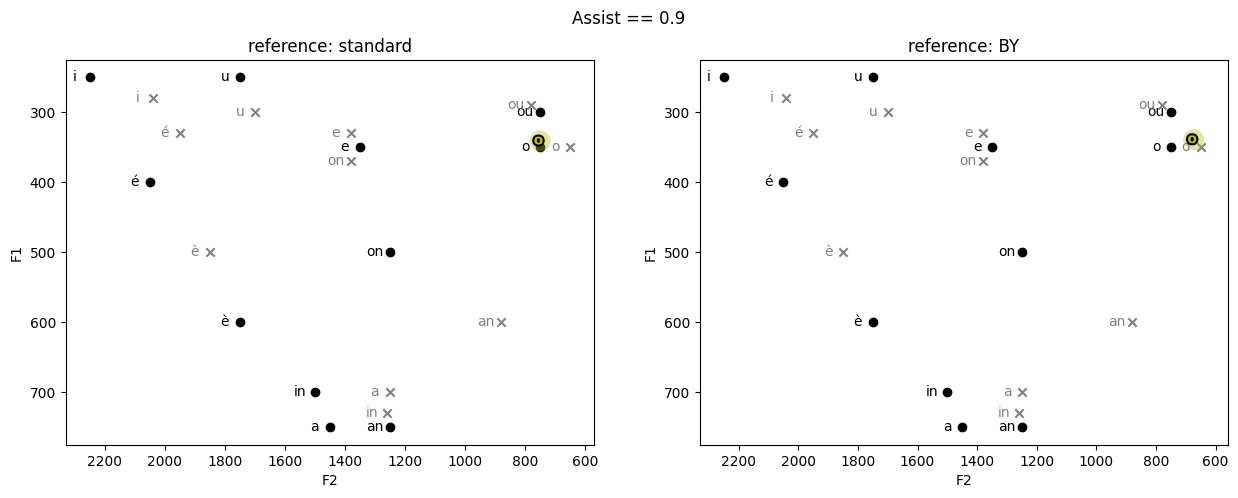

In [127]:
for assist in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    title = f'Assist == {assist}'
    selection = Trial.select().where(Trial.assist==assist)
    fig = plot_trials_both_ref(selection)
    fig.suptitle(title)

Text(0.5, 0.98, 'Non nasal vowels')

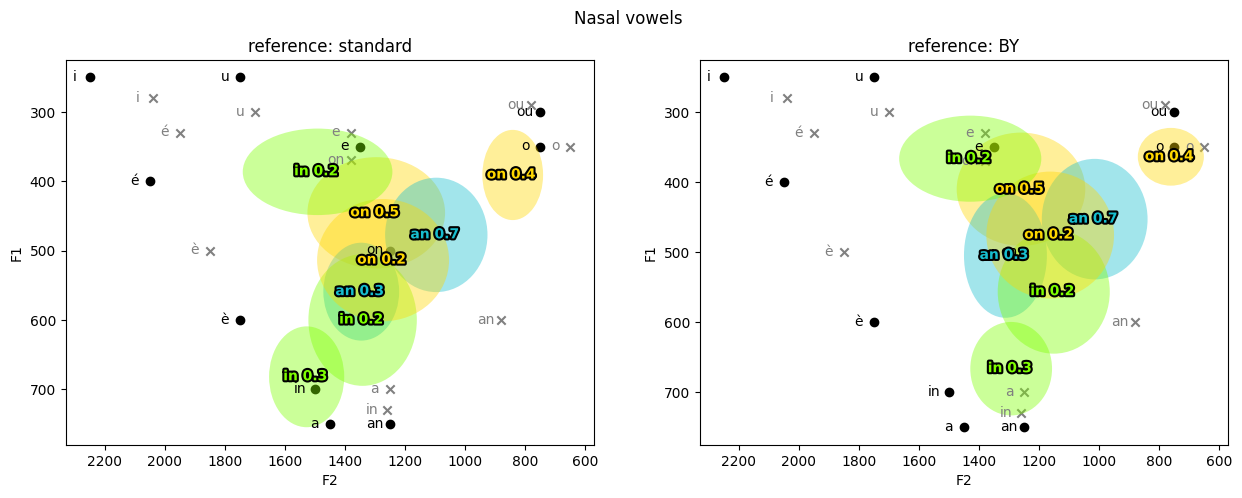

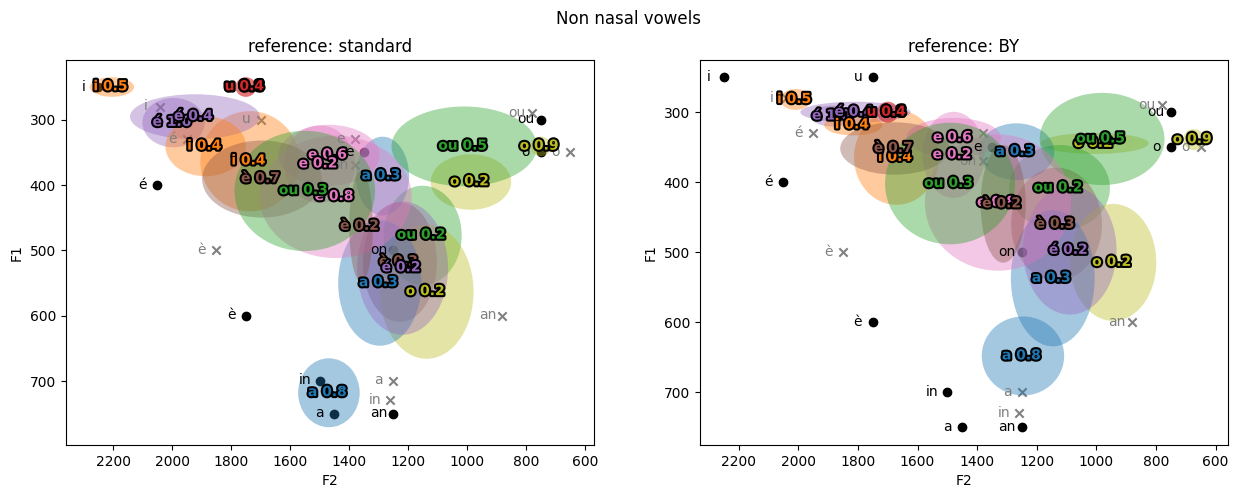

In [128]:
title = 'Nasal vowels'
selection = Trial.select().where( (Trial.truth=='an') | (Trial.truth=='in') | (Trial.truth=='on') )
fig = plot_trials_both_ref(selection, tags=['vowel', 'assist'])
fig.suptitle(title)

title = 'Non nasal vowels'
selection = Trial.select().where( ~((Trial.truth=='an') | (Trial.truth=='in') | (Trial.truth=='on')) )
fig = plot_trials_both_ref(selection, tags=['vowel', 'assist'])
fig.suptitle(title)

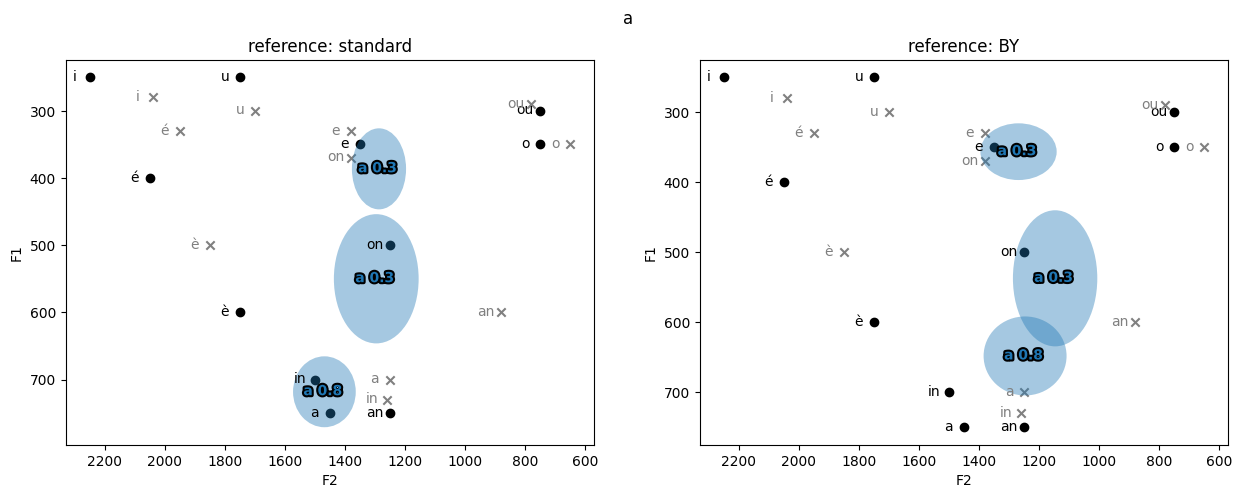

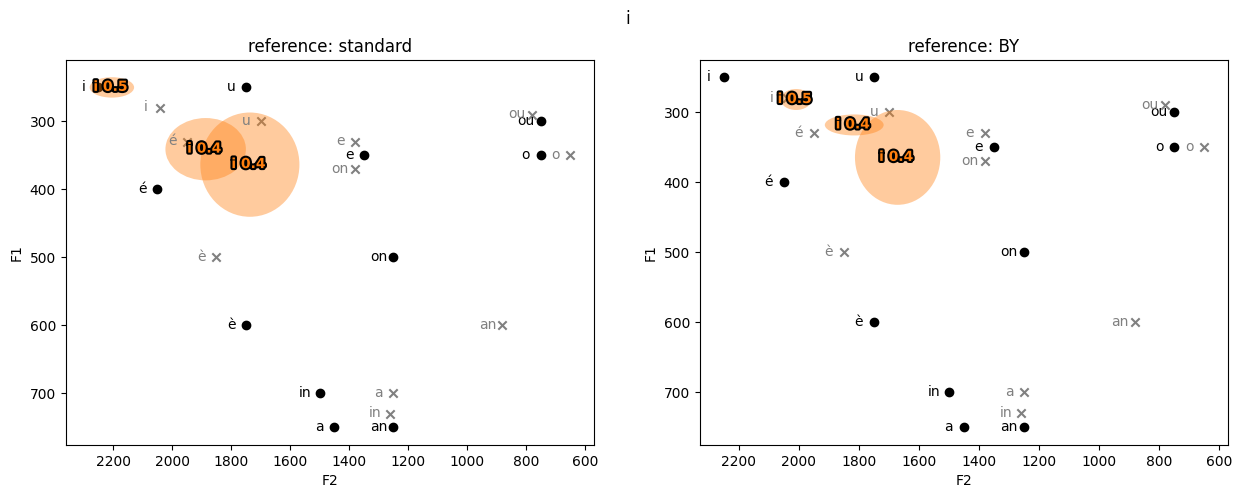

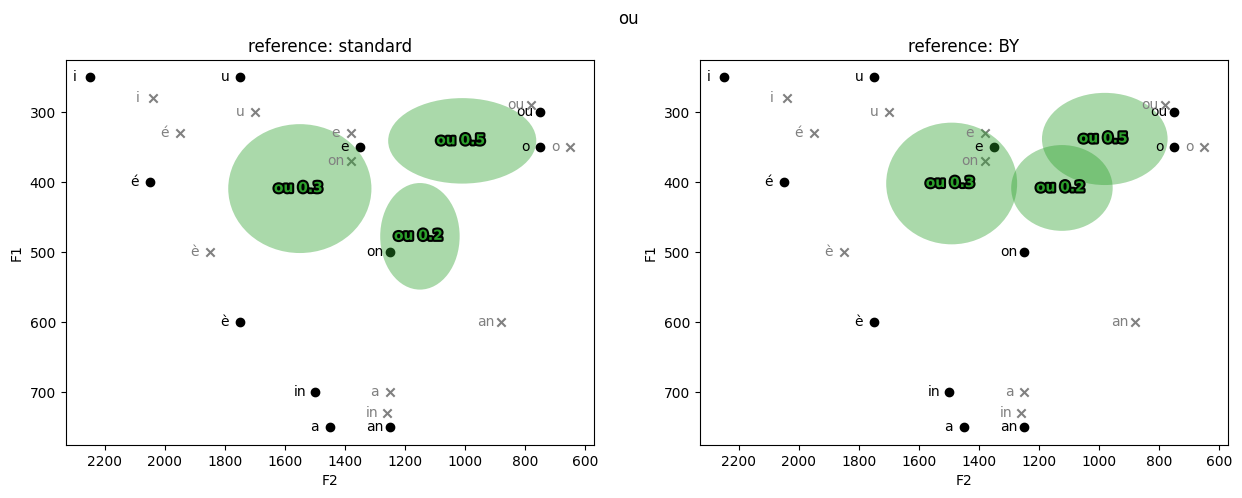

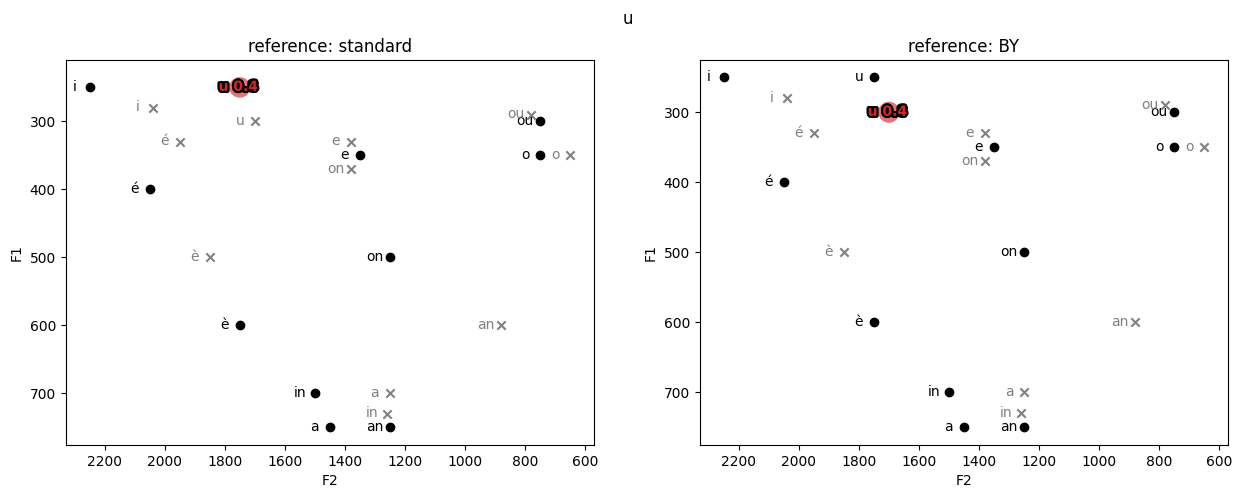

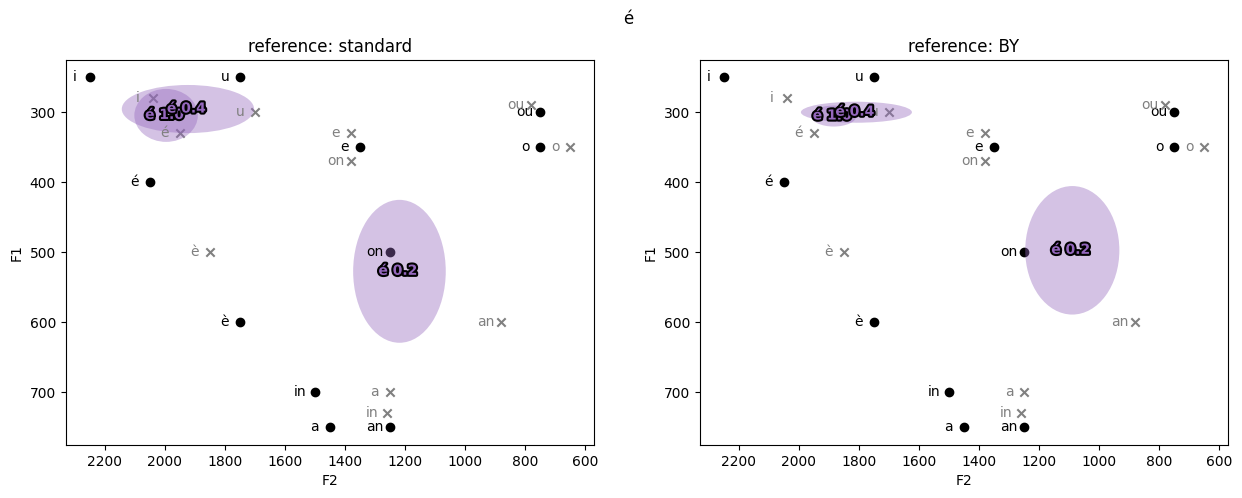

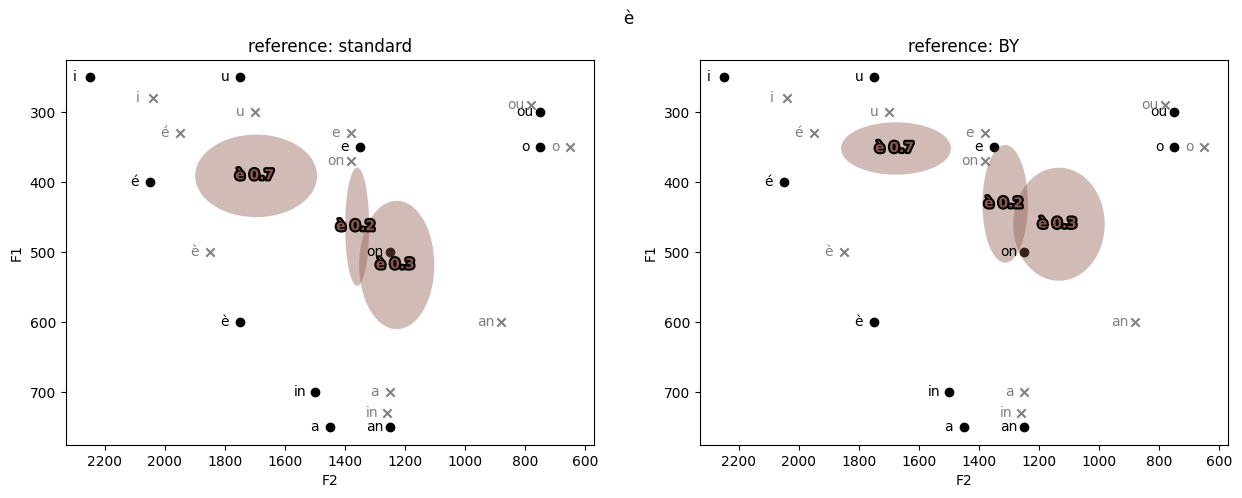

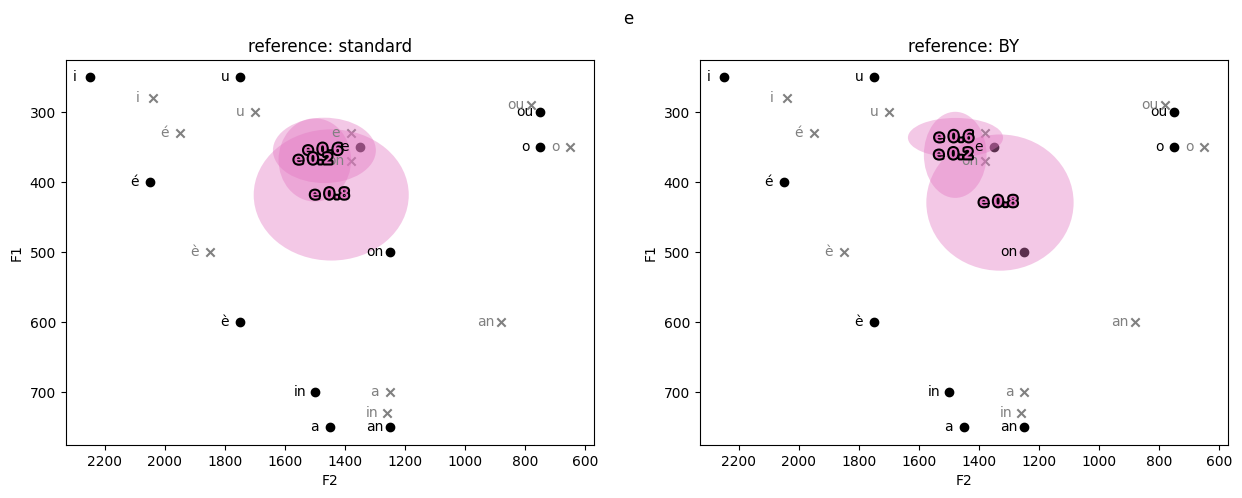

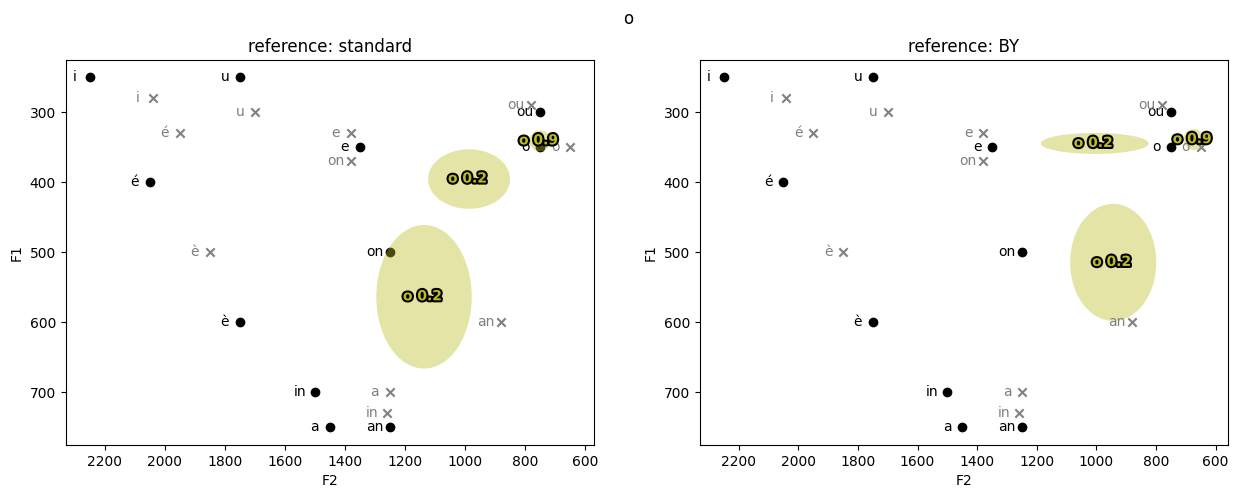

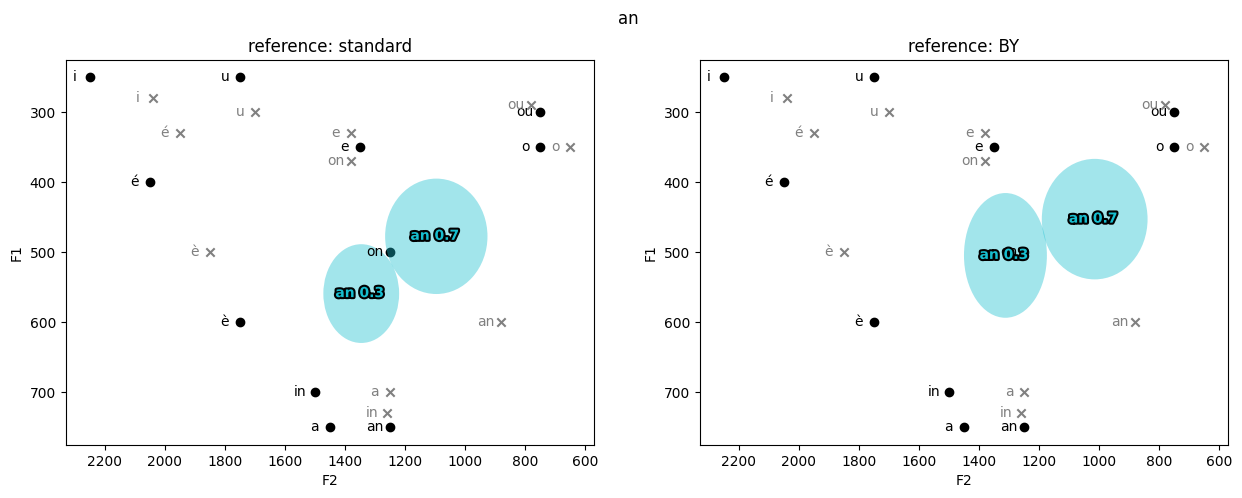

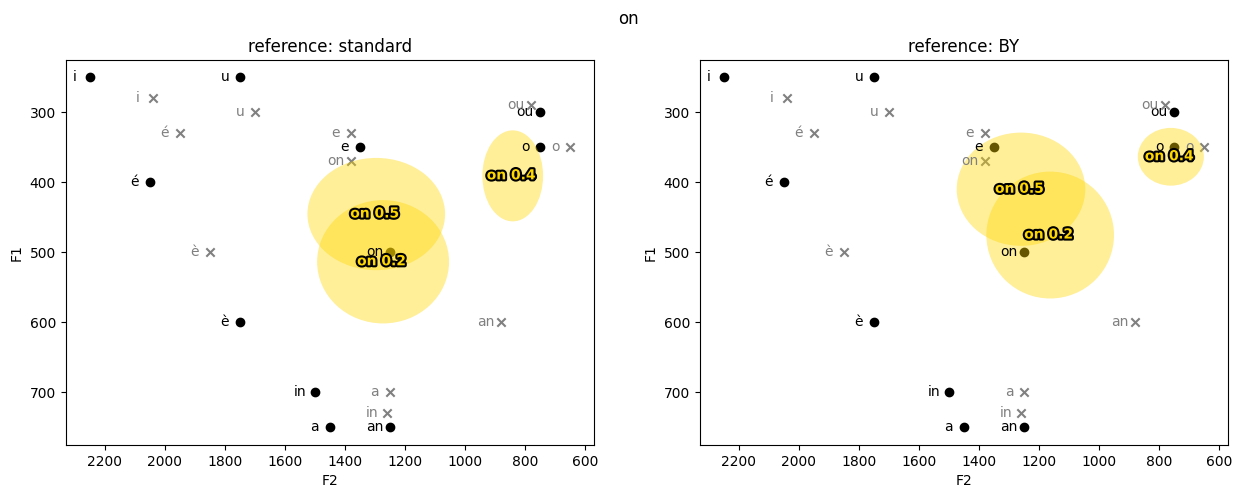

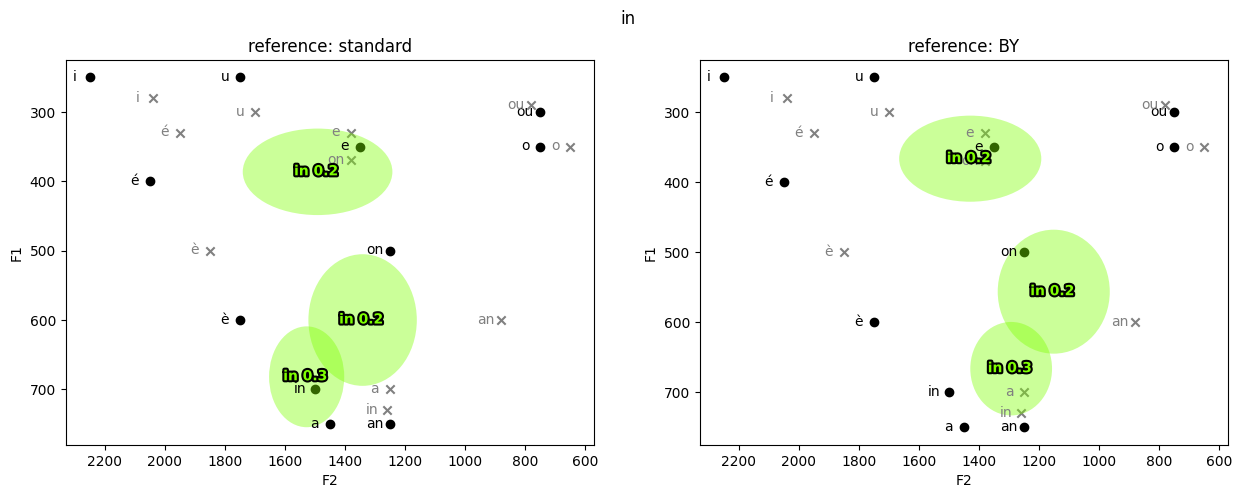

In [129]:
for v in vowels:
    selection = Trial.select().where(Trial.truth==v)
    fig = plot_trials_both_ref(selection, tags=['vowel', 'assist'])
    fig.suptitle(v)